In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from Libraries.get_absolute_path import get_absolute_path
import Libraries.preprocessing as preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import IncrementalPCA

from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression

from sklearn.metrics import classification_report

from pathlib import Path
import pickle

# Partie 1 : Preprocessing

In [4]:
metadatas = pd.read_csv(r'..\..\data\processed\metadatas_with_url.csv')
metadatas.head()

,FILE NAME,FORMAT,SIZE,URL,LABEL,IMG_URL,MASK_URL,MASK_RESIZED_URL,IMG_MASKED_URL
0,COVID-1,PNG,299*299,https://sirm.org/category/senza-categoria/covi...,COVID,data\raw\COVID\images\COVID-1.png,data\raw\COVID\masks\COVID-1.png,data\processed\COVID\masks\COVID-1.png,data\processed\COVID\images_masked\COVID-1.png
1,COVID-2,PNG,299*299,https://sirm.org/category/senza-categoria/covi...,COVID,data\raw\COVID\images\COVID-2.png,data\raw\COVID\masks\COVID-2.png,data\processed\COVID\masks\COVID-2.png,data\processed\COVID\images_masked\COVID-2.png
2,COVID-3,PNG,299*299,https://sirm.org/category/senza-categoria/covi...,COVID,data\raw\COVID\images\COVID-3.png,data\raw\COVID\masks\COVID-3.png,data\processed\COVID\masks\COVID-3.png,data\processed\COVID\images_masked\COVID-3.png
3,COVID-4,PNG,299*299,https://sirm.org/category/senza-categoria/covi...,COVID,data\raw\COVID\images\COVID-4.png,data\raw\COVID\masks\COVID-4.png,data\processed\COVID\masks\COVID-4.png,data\processed\COVID\images_masked\COVID-4.png
4,COVID-5,PNG,299*299,https://sirm.org/category/senza-categoria/covi...,COVID,data\raw\COVID\images\COVID-5.png,data\raw\COVID\masks\COVID-5.png,data\processed\COVID\masks\COVID-5.png,data\processed\COVID\images_masked\COVID-5.png


## Partie 1.1 : Ouverture des images, calcul des statistiques et séparation des jeux d'entraînement et de test

In [5]:
# Ouverture des images applaties
df_flat_images = preprocessing.flattened_images(metadatas=metadatas)
print('Les images ont été applaties')

# Calcul des stats
df_stats = preprocessing.get_stats(df_flat_images)
print("Les statistiques ont été calculées")

# enregistrement du dataframe des données
df_stats.to_csv(r'..\..\data\processed\radios_stats.csv', sep=',', encoding='utf-8', index=False, header=True) 

# Création du dataframe avec les images applaties, les statistiques associées et le label
df = pd.concat([df_flat_images, df_stats, metadatas['LABEL']], axis=1)

# Séparation de la target des variables explicatives
X = df.drop('LABEL', axis=1)
y = df['LABEL']

# Séparation des données en jeu d'entraînement et jeu de test
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Les données ont été séparées en jeu d'entraînement et de test")

img 0
img 1
img 2
img 3
img 4
img 5
img 6
img 7
img 8
img 9
img 10
img 11
img 12
img 13
img 14
img 15
img 16
img 17
img 18
img 19
img 20
img 21
img 22
img 23
img 24
img 25
img 26
img 27
img 28
img 29
img 30
img 31
img 32
img 33
img 34
img 35
img 36
img 37
img 38
img 39
img 40
img 41
img 42
img 43
img 44
img 45
img 46
img 47
img 48
img 49
img 50
img 51
img 52
img 53
img 54
img 55
img 56
img 57
img 58
img 59
img 60
img 61
img 62
img 63
img 64
img 65
img 66
img 67
img 68
img 69
img 70
img 71
img 72
img 73
img 74
img 75
img 76
img 77
img 78
img 79
img 80
img 81
img 82
img 83
img 84
img 85
img 86
img 87
img 88
img 89
img 90
img 91
img 92
img 93
img 94
img 95
img 96
img 97
img 98
img 99
img 100
img 101
img 102
img 103
img 104
img 105
img 106
img 107
img 108
img 109
img 110
img 111
img 112
img 113
img 114
img 115
img 116
img 117
img 118
img 119
img 120
img 121
img 122
img 123
img 124
img 125
img 126
img 127
img 128
img 129
img 130
img 131
img 132
img 133
img 134
img 135
img 136
img 137
img 13

In [6]:
# Vérification des proportions
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

LABEL
NORMAL             0.481550
LUNG OPACITY       0.284054
COVID              0.170848
VIRAL PNEUMONIA    0.063548
Name: proportion, dtype: float64
LABEL
NORMAL             0.481573
LUNG OPACITY       0.284018
COVID              0.170860
VIRAL PNEUMONIA    0.063548
Name: proportion, dtype: float64
LABEL
NORMAL             0.481455
LUNG OPACITY       0.284196
COVID              0.170801
VIRAL PNEUMONIA    0.063548
Name: proportion, dtype: float64


In [7]:
# Suppression des df inutiles
del df_flat_images
del df_stats
del df
del X
del y

## Partie 1.2 : Standardisation des données

In [ ]:
scaler = StandardScaler() # instance

# Entraînement et enregistrement du scaler aux données d'entraînement
preprocessing.fit_and_save_scaler(scaler, X_train_raw, path=r"notebooks\AntoineB\artifacts\scalers", file_name="standardscaler_imgs_stats.pkl")

In [8]:
# Application du scaler aux données d'entraînement et de test
X_train_norm = preprocessing.apply_scaler(X_train_raw, path=r"notebooks\AntoineB\artifacts\scalers\standardscaler_imgs_stats.pkl")
X_test_norm = preprocessing.apply_scaler(X_test_raw, path=r"notebooks\AntoineB\artifacts\scalers\standardscaler_imgs_stats.pkl")

Scaler appliqué aux données : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\scalers\standardscaler_imgs_stats.pkl
Scaler appliqué aux données : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\scalers\standardscaler_imgs_stats.pkl


In [9]:
# Suppression des df inutiles
del X_train_raw
del X_test_raw

# Réduction de l'espace occupé par les dataframe
X_train_norm = X_train_norm.astype('float32')
X_test_norm = X_test_norm.astype('float32')

## Partie 1.3 : Création d'un jeu aléatoirement augmenté

In [10]:
# Création d'un jeu de données aléatoirement augmenté
ros = RandomOverSampler(random_state=42)
X_train_ro, y_train_ro = ros.fit_resample(X_train_norm, y_train)

print("Proportions dans le dataset augmenté:", y_train_ro.value_counts())

Proportions dans le dataset augmenté: LABEL
NORMAL             8154
COVID              8154
VIRAL PNEUMONIA    8154
LUNG OPACITY       8154
Name: count, dtype: int64


## Partie 1.4 : Application d'une PCA sur les jeux augmenté et non augmenté

### Partie 1.4.1 : Identification du nombre de composantes nécessaires pour garder 90% de variance

In [9]:
# Entraînement d'un PCA pour les données augmentées
ipca_ro = IncrementalPCA()
preprocessing.fit_and_save_ipca(ipca_ro, batch_size=5000, df=X_train_ro, path=r"notebooks\AntoineB\artifacts\pca", file_name='pca_imgs&stats_ro.pkl')

Données sur lesquelles le PCA a été entraîné : 0
Données sur lesquelles le PCA a été entraîné : 5000
Données sur lesquelles le PCA a été entraîné : 10000
Données sur lesquelles le PCA a été entraîné : 15000
Données sur lesquelles le PCA a été entraîné : 20000
Données sur lesquelles le PCA a été entraîné : 25000
Données sur lesquelles le PCA a été entraîné : 30000
Données sur lesquelles le PCA a été entraîné : 32616
PCA enregistré à : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\pca\pca_imgs&stats_ro.pkl


In [10]:
# Entraînement d'un PCA pour les données non augmentées
ipca = IncrementalPCA()
preprocessing.fit_and_save_ipca(ipca, batch_size=5000, df=X_train_norm, path=r"notebooks\AntoineB\artifacts\pca", file_name='pca_imgs&stats.pkl')

Données sur lesquelles le PCA a été entraîné : 0
Données sur lesquelles le PCA a été entraîné : 5000
Données sur lesquelles le PCA a été entraîné : 10000
Données sur lesquelles le PCA a été entraîné : 15000
Données sur lesquelles le PCA a été entraîné : 16932
PCA enregistré à : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\pca\pca_imgs&stats.pkl


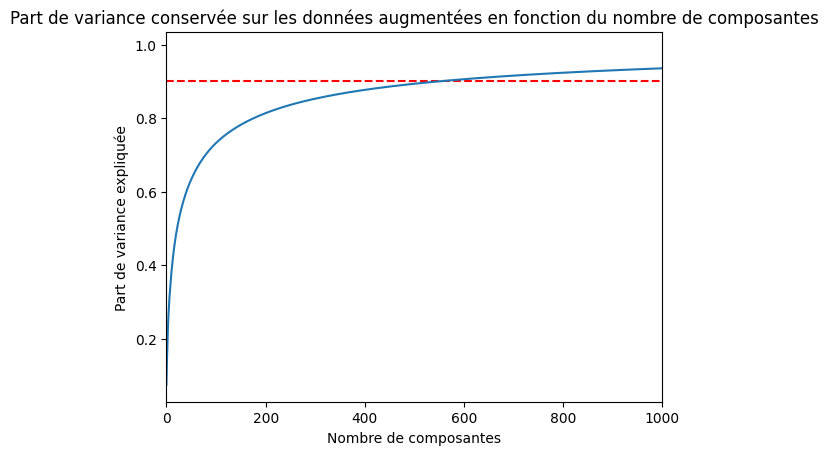

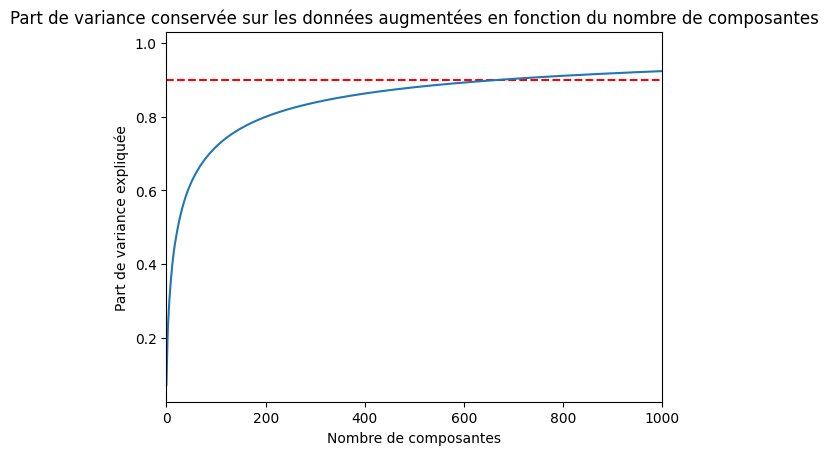

In [12]:
# visualisation de la variabilité en fonction du nombre de composantes

# Données augmentées
plt.figure()
plt.xlim(0,1000)
plt.title('Part de variance conservée sur les données augmentées en fonction du nombre de composantes')
plt.xlabel('Nombre de composantes')
plt.ylabel('Part de variance expliquée')
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(ipca_ro.explained_variance_ratio_.cumsum())
plt.show()

#Données non augmentées
plt.figure()
plt.xlim(0,1000)
plt.title('Part de variance conservée sur les données non augmentées en fonction du nombre de composantes')
plt.xlabel('Nombre de composantes')
plt.ylabel('Part de variance expliquée')
plt.axhline(y = 0.9, color ='r', linestyle = '--')
plt.plot(ipca.explained_variance_ratio_.cumsum())
plt.show()

On s'aperçoit que 600 composantes devraient être suffisantes pour représenter 90% de la variabilité, qui semble correct.

### Partie 1.4.2 : Ré-entrainement des PCA avec le bon nombre de composantes, et application aux jeux de données

In [13]:
# On réentraîne les PCA avec 600 composantes
ipca_ro = IncrementalPCA(n_components=600)
preprocessing.fit_and_save_ipca(ipca_ro, batch_size=5000, df=X_train_ro, path=r"notebooks\AntoineB\artifacts\pca", file_name='pca_imgs&stats_ro_600.pkl')

Données sur lesquelles le PCA a été entraîné : 0
Données sur lesquelles le PCA a été entraîné : 5000
Données sur lesquelles le PCA a été entraîné : 10000
Données sur lesquelles le PCA a été entraîné : 15000
Données sur lesquelles le PCA a été entraîné : 20000
Données sur lesquelles le PCA a été entraîné : 25000
Données sur lesquelles le PCA a été entraîné : 30000
Données sur lesquelles le PCA a été entraîné : 32616
PCA enregistré à : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\pca\pca_imgs&stats_ro_600.pkl


In [14]:
ipca = IncrementalPCA(n_components=600)
preprocessing.fit_and_save_ipca(ipca, batch_size=5000, df=X_train_norm, path=r"notebooks\AntoineB\artifacts\pca", file_name='pca_imgs&stats_600.pkl')

Données sur lesquelles le PCA a été entraîné : 0
Données sur lesquelles le PCA a été entraîné : 5000
Données sur lesquelles le PCA a été entraîné : 10000
Données sur lesquelles le PCA a été entraîné : 15000
Données sur lesquelles le PCA a été entraîné : 16932
PCA enregistré à : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\pca\pca_imgs&stats_600.pkl


In [11]:
# Application des PCA aux jeux de données correspondants
X_train_ro, ipca_ro = preprocessing.apply_pca(X_train_ro, path=r"notebooks\AntoineB\artifacts\pca\pca_imgs&stats_ro_600.pkl")
X_train_norm, ipca = preprocessing.apply_pca(X_train_norm, path=r"notebooks\AntoineB\artifacts\pca\pca_imgs&stats_600.pkl")
X_test_ro, _ = preprocessing.apply_pca(X_test_norm, path=r"notebooks\AntoineB\artifacts\pca\pca_imgs&stats_ro_600.pkl")
X_test_norm, _ = preprocessing.apply_pca(X_test_norm, path=r"notebooks\AntoineB\artifacts\pca\pca_imgs&stats_600.pkl")

PCA appliqué aux données : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\pca\pca_imgs&stats_ro_600.pkl
PCA appliqué aux données : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\pca\pca_imgs&stats_600.pkl
PCA appliqué aux données : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\pca\pca_imgs&stats_ro_600.pkl
PCA appliqué aux données : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\pca\pca_imgs&stats_600.pkl


In [12]:
# Calcul de variabilité représentée par nos 500 features
print("Variabilité concervée par les 600 features sur les données augmentées:", round(ipca_ro.explained_variance_ratio_.sum(), 2))
print("Variabilité concervée par les 600 features sur les données non augmentées:", round(ipca.explained_variance_ratio_.sum(), 2))

Variabilité concervée par les 600 features sur les données augmentées: 0.9
Variabilité concervée par les 600 features sur les données non augmentées: 0.89


In [13]:
del ipca_ro
del ipca

## Partie 1.5 : Encodage des target

In [14]:
encoder = LabelEncoder()

# Encodage des variables cibles
preprocessing.fit_and_save_encoder(encoder, y_train, path=r"notebooks\AntoineB\artifacts\scalers", file_name="label_encoder.pkl")
y_train, label_encoder = preprocessing.apply_encoder(y_train, path=r"notebooks\AntoineB\artifacts\scalers\label_encoder.pkl")
y_train_ro, _ = preprocessing.apply_encoder(y_train_ro, path=r"notebooks\AntoineB\artifacts\scalers\label_encoder.pkl")
y_test, _ = preprocessing.apply_encoder(y_test, path=r"notebooks\AntoineB\artifacts\scalers\label_encoder.pkl")

Encoder enregistré à : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\scalers\label_encoder.pkl
Encodeur appliqué aux données : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\scalers\label_encoder.pkl
Encodeur appliqué aux données : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\scalers\label_encoder.pkl
Encodeur appliqué aux données : C:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\notebooks\AntoineB\artifacts\scalers\label_encoder.pkl


In [15]:
mapping = dict(enumerate(encoder.classes_))
print("Mapping des labels encodés aux classes originales :", mapping)

Mapping des labels encodés aux classes originales : {0: 'COVID', 1: 'LUNG OPACITY', 2: 'NORMAL', 3: 'VIRAL PNEUMONIA'}


# Partie 2 : Test de HistGradientBoostingClassifier sur les jeux augmentés et non augmentés

In [14]:
# Entraînement sur le jeu non augmenté
clf = HistGradientBoostingClassifier(random_state=42)
clf.fit(X_train_norm, y_train)

# Entraînement sur le jeu augmenté
clf_ro = HistGradientBoostingClassifier(random_state=42)
clf_ro.fit(X_train_ro, y_train_ro)

c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


HistGradientBoostingClassifier(random_state=42)

In [15]:

# Première estimation des accuracy sur le jeu de test
print("Accuracy du modèle entraîné sur les données non augmentées:", clf.score(X_test_norm, y_test))
print("Accuracy du modèle entraîné sur les données augmentées:", clf_ro.score(X_test_ro, y_test))

Accuracy du modèle entraîné sur les données non augmentées: 0.7134420033073471
Accuracy du modèle entraîné sur les données augmentées: 0.7068273092369478


In [16]:
y_pred_ro = clf_ro.predict(X_test_ro)
y_pred = clf.predict(X_test_norm)

In [17]:
from sklearn.metrics import classification_report

print("Résultats sur modèle entraîné sur jeu non augmenté\n", classification_report(y_test, y_pred)) 
print("Résultats sur modèle entraîné sur jeu augmenté\n", classification_report(y_test, y_pred_ro)) 

Résultats sur modèle entraîné sur jeu non augmenté
               precision    recall  f1-score   support

           0       0.63      0.32      0.42       723
           1       0.66      0.68      0.67      1203
           2       0.74      0.87      0.80      2038
           3       0.90      0.74      0.81       269

    accuracy                           0.71      4233
   macro avg       0.73      0.65      0.68      4233
weighted avg       0.71      0.71      0.70      4233

Résultats sur modèle entraîné sur jeu augmenté
               precision    recall  f1-score   support

           0       0.52      0.44      0.47       723
           1       0.64      0.68      0.66      1203
           2       0.78      0.80      0.79      2038
           3       0.84      0.83      0.84       269

    accuracy                           0.71      4233
   macro avg       0.70      0.69      0.69      4233
weighted avg       0.70      0.71      0.70      4233



In [18]:
# Matrice de confusion du modèle entraîné sur le jeu non augmenté
display(pd.crosstab(y_test, y_pred, rownames=['CLasses réelles'], colnames=['Classes prédites']))

Classes prédites,0,1,2,3
CLasses réelles,,,,
0,229,215,276,3
1,66,822,312,3
2,61,191,1770,16
3,9,24,37,199


In [19]:
# Matrice de confusion du modèle entraîné sur le jeu augmenté
display(pd.crosstab(y_test, y_pred_ro, rownames=['CLasses réelles'], colnames=['Classes prédites']))

Classes prédites,0,1,2,3
CLasses réelles,,,,
0,316,200,204,3
1,154,813,228,8
2,132,236,1639,31
3,11,13,21,224


# Partie 3 : Optimisation du modèle

In [65]:
from skopt import BayesSearchCV, callbacks
from sklearn.metrics import classification_report

In [66]:
# Définition d'un callback pour suivre l'évolution du BayesSearch
def print_infos_callback(res):
    print('---------------------------------------------------------------')
    print(f"Iteration {len(res.x_iters)}, Parameters: {res.x_iters[-1]}")
    print(f"f1-score: {-res.func_vals[-1]}")
    print(f"Best parameters: {res.x}")
    print(f"Best f1-score: {-res.fun}")

In [72]:
# Malgrès une différence faible à première vue, nous décidons d'entraîner le modèle avec les données augmentées
model_lgbm = HistGradientBoostingClassifier(random_state=42)
model_ridgeclf = RidgeClassifier(random_state=42)
model_lr = LogisticRegression(random_state=42)

# Grille de recherche
param_grid_lgbm = {
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'max_iter' : [100, 200, 400],
    'max_leaf_nodes' : [15, 31, 63],
    'min_samples_leaf' : [10, 20, 30],
    'max_depth' : [None, 5, 10, 20],
    'l2_regularization' : [0, 1, 10],
}

param_grid_ridgeclf = {
    "alpha" : [0.01, 0.1, 1, 10, 100, 1000],
    "solver" : ['auto', 'cholesky', 'lsqr', 'sag', 'saga'],
    "tol" : [1e-4, 1e-3, 1e-2],
    'max_iter': [100, 500, 1000]
}

param_grid_lr = [
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['sag', 'saga'],
        'max_iter': [100, 500, 1000],
    },
    {
        'penalty': ['l1', 'elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['saga'],
        'l1_ratio': [0.1, 0.5, 0.9],
        'max_iter': [100, 500, 1000],
    }
]

---------------------------------------------------------------
Iteration 1, Parameters: [1, 0.1, 20, 100, 63, 20]
f1-score: 0.9114932892378904
Best parameters: [1, 0.1, 20, 100, 63, 20]
Best f1-score: 0.9114932892378904
---------------------------------------------------------------
Iteration 2, Parameters: [10, 0.2, 5, 400, 63, 10]
f1-score: 0.911650785131903
Best parameters: [10, 0.2, 5, 400, 63, 10]
Best f1-score: 0.911650785131903
---------------------------------------------------------------
Iteration 3, Parameters: [1, 0.2, None, 200, 15, 20]
f1-score: 0.9043170420540306
Best parameters: [10, 0.2, 5, 400, 63, 10]
Best f1-score: 0.911650785131903
---------------------------------------------------------------
Iteration 4, Parameters: [10, 0.01, 10, 400, 31, 10]
f1-score: 0.8238413733763617
Best parameters: [10, 0.2, 5, 400, 63, 10]
Best f1-score: 0.911650785131903
---------------------------------------------------------------
Iteration 5, Parameters: [10, 0.05, 10, 400, 63, 30]

c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


BayesSearchCV(cv=5, estimator=HistGradientBoostingClassifier(random_state=42),
              n_jobs=10, random_state=42, scoring='f1_macro',
              search_spaces={'l2_regularization': [0, 1, 10],
                             'learning_rate': [0.01, 0.05, 0.1, 0.2],
                             'max_depth': [None, 5, 10, 20],
                             'max_iter': [100, 200, 400],
                             'max_leaf_nodes': [15, 31, 63],
                             'min_samples_leaf': [10, 20, 30]})

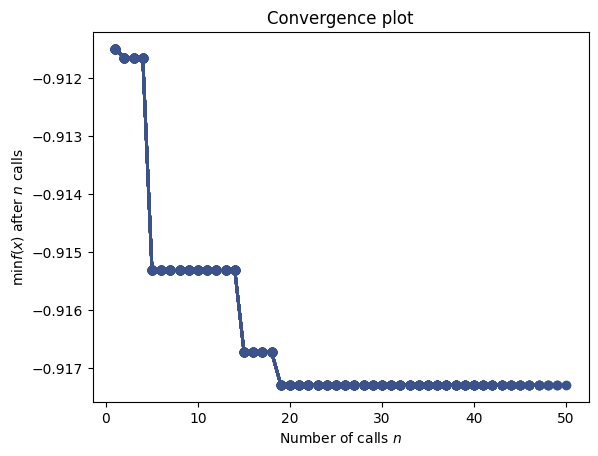

In [50]:
# Instanciation des callbacks pour la recherches des meilleurs paramètres
print_infos_cbk = print_infos_callback(X_train_ro, y_train_ro, X_test_ro, y_test)
checkpoint_clbk = callbacks.CheckpointSaver(checkpoint_path=r".\result.pkl")

---------------------------------------------------------------
Iteration 1, Parameters: [1, 0.1, 20, 100, 63, 20]
f1-score: 0.9114932892378904
Best parameters: [1, 0.1, 20, 100, 63, 20]
Best f1-score: 0.9114932892378904
---------------------------------------------------------------
Iteration 2, Parameters: [10, 0.2, 5, 400, 63, 10]
f1-score: 0.911650785131903
Best parameters: [10, 0.2, 5, 400, 63, 10]
Best f1-score: 0.911650785131903
---------------------------------------------------------------
Iteration 3, Parameters: [1, 0.2, None, 200, 15, 20]
f1-score: 0.9043170420540306
Best parameters: [10, 0.2, 5, 400, 63, 10]
Best f1-score: 0.911650785131903
---------------------------------------------------------------
Iteration 4, Parameters: [10, 0.01, 10, 400, 31, 10]
f1-score: 0.8238413733763617
Best parameters: [10, 0.2, 5, 400, 63, 10]
Best f1-score: 0.911650785131903
---------------------------------------------------------------
Iteration 5, Parameters: [10, 0.05, 10, 400, 63, 30]

BayesSearchCV(cv=5, estimator=HistGradientBoostingClassifier(random_state=42),
              n_iter=100, n_jobs=10, random_state=42, return_train_score=True,
              scoring='f1_macro',
              search_spaces={'l2_regularization': [0, 1, 10],
                             'learning_rate': [0.01, 0.05, 0.1, 0.2],
                             'max_depth': [None, 5, 10, 20],
                             'max_iter': [100, 200, 400],
                             'max_leaf_nodes': [15, 31, 63],
                             'min_samples_leaf': [10, 20, 30]})

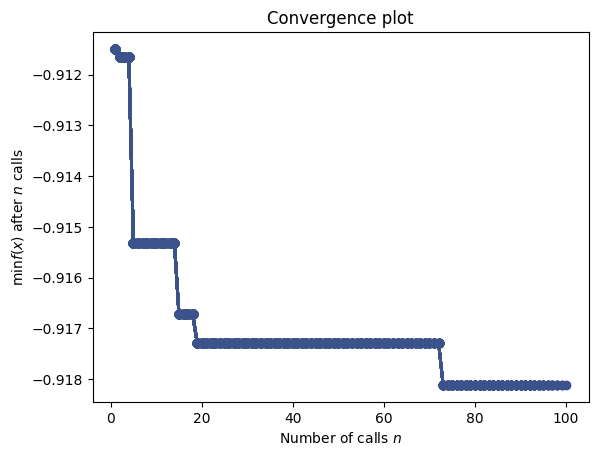

In [68]:
# Recherche des meilleurs paramètres pour HistGradientBoostingClassifier
bayes_search_lgbm = BayesSearchCV(estimator=model_lgbm, 
                                  search_spaces=param_grid_lgbm, 
                                  n_iter=100, 
                                  cv=5, 
                                  scoring='f1_macro', 
                                  n_jobs=10, 
                                  return_train_score=True, 
                                  random_state=42)
bayes_search_lgbm.fit(X_train_ro, y_train_ro, callback=[checkpoint_clbk, print_infos_cbk])

---------------------------------------------------------------
Iteration 1, Parameters: [1, 1000, 'saga', 0.0001]
f1-score: 0.6412874976097187
Best parameters: [1, 1000, 'saga', 0.0001]
Best f1-score: 0.6412874976097187
---------------------------------------------------------------
Iteration 2, Parameters: [1000, 1000, 'cholesky', 0.01]
f1-score: 0.6413767221421286
Best parameters: [1000, 1000, 'cholesky', 0.01]
Best f1-score: 0.6413767221421286
---------------------------------------------------------------
Iteration 3, Parameters: [1, 1000, 'auto', 0.001]
f1-score: 0.641044964465527
Best parameters: [1000, 1000, 'cholesky', 0.01]
Best f1-score: 0.6413767221421286
---------------------------------------------------------------
Iteration 4, Parameters: [100, 100, 'lsqr', 0.01]
f1-score: 0.6326339600746912
Best parameters: [1000, 1000, 'cholesky', 0.01]
Best f1-score: 0.6413767221421286
---------------------------------------------------------------
Iteration 5, Parameters: [100, 500,

c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1000, 'saga', 0.01] before, using random point [10, 500, 'cholesky', 0.001]
  warnings.warn(


---------------------------------------------------------------
Iteration 73, Parameters: [10, 500, 'cholesky', 0.001]
f1-score: 0.6410437190169587
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 100, 'sag', 0.001] before, using random point [0.01, 500, 'cholesky', 0.0001]
  warnings.warn(


---------------------------------------------------------------
Iteration 74, Parameters: [0.01, 500, 'cholesky', 0.0001]
f1-score: 0.641044964465527
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 75, Parameters: [10, 500, 'lsqr', 0.001]
f1-score: 0.640673002270283
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 76, Parameters: [1, 100, 'cholesky', 0.01]
f1-score: 0.641044964465527
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 77, Parameters: [100, 500, 'sag', 0.0001]
f1-score: 0.6413151043243195
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 78, Parameters: [0.1, 1000, 'lsqr', 0.01]
f

c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 500, 'lsqr', 0.001] before, using random point [1, 1000, 'auto', 0.001]
  warnings.warn(


---------------------------------------------------------------
Iteration 79, Parameters: [1, 1000, 'auto', 0.001]
f1-score: 0.641044964465527
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 80, Parameters: [100, 1000, 'lsqr', 0.0001]
f1-score: 0.6412575371316289
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 81, Parameters: [1000, 1000, 'auto', 0.0001]
f1-score: 0.6413767221421286
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 82, Parameters: [100, 100, 'lsqr', 0.0001]
f1-score: 0.6412575371316289
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 83, Parameters: [1000, 500, 'auto', 0.01]


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100, 500, 'lsqr', 0.01] before, using random point [10, 1000, 'lsqr', 0.0001]
  warnings.warn(


---------------------------------------------------------------
Iteration 86, Parameters: [10, 1000, 'lsqr', 0.0001]
f1-score: 0.6412575371316289
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 87, Parameters: [10, 500, 'auto', 0.01]
f1-score: 0.6410437190169587
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1000, 100, 'auto', 0.0001] before, using random point [1, 100, 'auto', 0.0001]
  warnings.warn(


---------------------------------------------------------------
Iteration 88, Parameters: [1, 100, 'auto', 0.0001]
f1-score: 0.641044964465527
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 89, Parameters: [10, 1000, 'auto', 0.001]
f1-score: 0.6410437190169587
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 90, Parameters: [1000, 1000, 'sag', 0.01]
f1-score: 0.6383084540001531
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100, 100, 'sag', 0.0001] before, using random point [0.1, 1000, 'lsqr', 0.0001]
  warnings.warn(


---------------------------------------------------------------
Iteration 91, Parameters: [0.1, 1000, 'lsqr', 0.0001]
f1-score: 0.6412575371316289
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 92, Parameters: [10, 100, 'lsqr', 0.001]
f1-score: 0.640673002270283
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 93, Parameters: [10, 500, 'lsqr', 0.0001]
f1-score: 0.6412575371316289
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [100, 100, 'sag', 0.0001] before, using random point [100, 100, 'lsqr', 0.0001]
  warnings.warn(


---------------------------------------------------------------
Iteration 94, Parameters: [100, 100, 'lsqr', 0.0001]
f1-score: 0.6412575371316289
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 95, Parameters: [1000, 100, 'cholesky', 0.001]
f1-score: 0.6413767221421286
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 96, Parameters: [1000, 100, 'sag', 0.0001]
f1-score: 0.6415734816795495
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 97, Parameters: [0.01, 500, 'auto', 0.0001]
f1-score: 0.641044964465527
Best parameters: [10, 100, 'sag', 0.001]
Best f1-score: 0.6416799685020365
---------------------------------------------------------------
Iteration 98, Parameters: [1000, 100, 'saga', 0.

c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


BayesSearchCV(cv=5, estimator=RidgeClassifier(random_state=42), n_iter=100,
              n_jobs=10, random_state=42, return_train_score=True,
              scoring='f1_macro',
              search_spaces={'alpha': [0.01, 0.1, 1, 10, 100, 1000],
                             'max_iter': [100, 500, 1000],
                             'solver': ['auto', 'cholesky', 'lsqr', 'sag',
                                        'saga'],
                             'tol': [0.0001, 0.001, 0.01]})

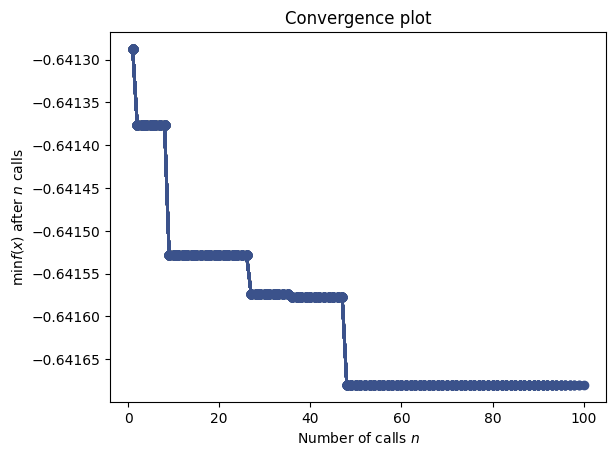

In [69]:
# Recherche des meilleurs paramètres pour RidgeClassifier
bayes_search_ridgeclf = BayesSearchCV(estimator=model_ridgeclf, 
                                      search_spaces=param_grid_ridgeclf, 
                                      n_iter=100, 
                                      cv=5, 
                                      scoring='f1_macro', 
                                      n_jobs=10, 
                                      return_train_score=True, 
                                      random_state=42)
bayes_search_ridgeclf.fit(X_train_ro, y_train_ro, callback=[checkpoint_clbk, print_infos_cbk])

---------------------------------------------------------------
Iteration 1, Parameters: [10, 1000, 'l2', 'saga']
f1-score: 0.6614092839408447
Best parameters: [10, 1000, 'l2', 'saga']
Best f1-score: 0.6614092839408447
---------------------------------------------------------------
Iteration 2, Parameters: [0.1, 1000, 'l2', 'sag']
f1-score: 0.6650106338781926
Best parameters: [0.1, 1000, 'l2', 'sag']
Best f1-score: 0.6650106338781926
---------------------------------------------------------------
Iteration 3, Parameters: [10, 100, 'l2', 'saga']
f1-score: 0.6478638523424373
Best parameters: [0.1, 1000, 'l2', 'sag']
Best f1-score: 0.6650106338781926
---------------------------------------------------------------
Iteration 4, Parameters: [1, 500, 'l2', 'saga']
f1-score: 0.659408666203903
Best parameters: [0.1, 1000, 'l2', 'sag']
Best f1-score: 0.6650106338781926
---------------------------------------------------------------
Iteration 5, Parameters: [1, 1000, 'l2', 'sag']
f1-score: 0.6649

c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [1, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 17, Parameters: [1, 100, 'l2', 'sag']
f1-score: 0.6533057746274082
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756
---------------------------------------------------------------
Iteration 18, Parameters: [10, 500, 'l2', 'sag']
f1-score: 0.6614086881464075
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756
---------------------------------------------------------------
Iteration 19, Parameters: [0.01, 100, 'l2', 'saga']
f1-score: 0.6478640729573887
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.01, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 20, Parameters: [0.01, 100, 'l2', 'saga']
f1-score: 0.6478640729573887
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756
---------------------------------------------------------------
Iteration 21, Parameters: [0.1, 100, 'l2', 'sag']
f1-score: 0.6533057746274082
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 100, 'l2', 'saga'] before, using random point [0.01, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 22, Parameters: [0.01, 100, 'l2', 'sag']
f1-score: 0.6533375048845944
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.1, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 23, Parameters: [0.1, 500, 'l2', 'saga']
f1-score: 0.659476345811942
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.1, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 24, Parameters: [0.1, 500, 'l2', 'sag']
f1-score: 0.6614046151292008
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.1, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 25, Parameters: [0.1, 500, 'l2', 'sag']
f1-score: 0.6614046151292008
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756
---------------------------------------------------------------
Iteration 26, Parameters: [1, 500, 'l2', 'sag']
f1-score: 0.6614086881464075
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756
---------------------------------------------------------------
Iteration 27, Parameters: [0.001, 100, 'l2', 'saga']
f1-score: 0.6477563446341248
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.001, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 28, Parameters: [0.001, 100, 'l2', 'saga']
f1-score: 0.6477563446341248
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756
---------------------------------------------------------------
Iteration 29, Parameters: [0.01, 1000, 'l2', 'saga']
f1-score: 0.6614062794391873
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 100, 'l2', 'sag'] before, using random point [0.1, 1000, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 30, Parameters: [0.1, 1000, 'l2', 'sag']
f1-score: 0.6650106338781926
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [1, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 31, Parameters: [1, 500, 'l2', 'sag']
f1-score: 0.6614086881464075
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 1000, 'l2', 'saga'] before, using random point [1, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 32, Parameters: [1, 500, 'l2', 'sag']
f1-score: 0.6614086881464075
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [1, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 33, Parameters: [1, 500, 'l2', 'saga']
f1-score: 0.659408666203903
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.001, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 34, Parameters: [0.001, 500, 'l2', 'sag']
f1-score: 0.6613410221550017
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'saga'] before, using random point [0.01, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 35, Parameters: [0.01, 100, 'l2', 'saga']
f1-score: 0.6478640729573887
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 1000, 'l2', 'sag'] before, using random point [1, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 36, Parameters: [1, 100, 'l2', 'sag']
f1-score: 0.6533057746274082
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [10, 1000, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 37, Parameters: [10, 1000, 'l2', 'sag']
f1-score: 0.6650293724955285
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.001, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 38, Parameters: [0.001, 500, 'l2', 'sag']
f1-score: 0.6613410221550017
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 100, 'l2', 'saga'] before, using random point [1, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 39, Parameters: [1, 100, 'l2', 'sag']
f1-score: 0.6533057746274082
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 500, 'l2', 'sag'] before, using random point [0.001, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 40, Parameters: [0.001, 100, 'l2', 'saga']
f1-score: 0.6477563446341248
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 500, 'l2', 'sag'] before, using random point [0.001, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 41, Parameters: [0.001, 100, 'l2', 'sag']
f1-score: 0.6533165494109024
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 500, 'l2', 'sag'] before, using random point [0.001, 1000, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 42, Parameters: [0.001, 1000, 'l2', 'sag']
f1-score: 0.6642115768176751
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 1000, 'l2', 'saga'] before, using random point [1, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 43, Parameters: [1, 100, 'l2', 'saga']
f1-score: 0.6478638523424373
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 100, 'l2', 'saga'] before, using random point [10, 1000, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 44, Parameters: [10, 1000, 'l2', 'saga']
f1-score: 0.6614092839408447
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.01, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 45, Parameters: [0.01, 500, 'l2', 'saga']
f1-score: 0.6593038327739954
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [1, 1000, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 46, Parameters: [1, 1000, 'l2', 'sag']
f1-score: 0.6649536940639026
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.001, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 47, Parameters: [0.001, 500, 'l2', 'sag']
f1-score: 0.6613410221550017
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.1, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 48, Parameters: [0.1, 500, 'l2', 'saga']
f1-score: 0.659476345811942
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756
---------------------------------------------------------------
Iteration 49, Parameters: [10, 100, 'l2', 'sag']
f1-score: 0.6533057746274082
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 1000, 'l2', 'sag'] before, using random point [1, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 50, Parameters: [1, 500, 'l2', 'saga']
f1-score: 0.659408666203903
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 500, 'l2', 'saga'] before, using random point [0.001, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 51, Parameters: [0.001, 100, 'l2', 'saga']
f1-score: 0.6477563446341248
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 100, 'l2', 'saga'] before, using random point [0.01, 1000, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 52, Parameters: [0.01, 1000, 'l2', 'saga']
f1-score: 0.6614062794391873
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 100, 'l2', 'saga'] before, using random point [0.01, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 53, Parameters: [0.01, 100, 'l2', 'sag']
f1-score: 0.6533375048845944
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1000, 'l2', 'saga'] before, using random point [0.001, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 54, Parameters: [0.001, 500, 'l2', 'sag']
f1-score: 0.6613410221550017
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.01, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 55, Parameters: [0.01, 100, 'l2', 'saga']
f1-score: 0.6478640729573887
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.001, 1000, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 56, Parameters: [0.001, 1000, 'l2', 'sag']
f1-score: 0.6642115768176751
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 100, 'l2', 'sag'] before, using random point [10, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 57, Parameters: [10, 100, 'l2', 'saga']
f1-score: 0.6478638523424373
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.01, 1000, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 58, Parameters: [0.01, 1000, 'l2', 'saga']
f1-score: 0.6614062794391873
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 1000, 'l2', 'sag'] before, using random point [0.1, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 59, Parameters: [0.1, 100, 'l2', 'sag']
f1-score: 0.6533057746274082
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 500, 'l2', 'saga'] before, using random point [0.1, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 60, Parameters: [0.1, 500, 'l2', 'saga']
f1-score: 0.659476345811942
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 100, 'l2', 'sag'] before, using random point [0.001, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 61, Parameters: [0.001, 100, 'l2', 'sag']
f1-score: 0.6533165494109024
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.1, 1000, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 62, Parameters: [0.1, 1000, 'l2', 'sag']
f1-score: 0.6650106338781926
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.001, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 63, Parameters: [0.001, 100, 'l2', 'sag']
f1-score: 0.6533165494109024
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 1000, 'l2', 'sag'] before, using random point [0.1, 1000, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 64, Parameters: [0.1, 1000, 'l2', 'saga']
f1-score: 0.6614042364975286
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.01, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 65, Parameters: [0.01, 100, 'l2', 'saga']
f1-score: 0.6478640729573887
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1000, 'l2', 'sag'] before, using random point [0.01, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 66, Parameters: [0.01, 500, 'l2', 'saga']
f1-score: 0.6593038327739954
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [10, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 67, Parameters: [10, 500, 'l2', 'saga']
f1-score: 0.659408666203903
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.01, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 68, Parameters: [0.01, 500, 'l2', 'sag']
f1-score: 0.6614062794391873
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 100, 'l2', 'saga'] before, using random point [0.1, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 69, Parameters: [0.1, 500, 'l2', 'sag']
f1-score: 0.6614046151292008
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.1, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 70, Parameters: [0.1, 100, 'l2', 'saga']
f1-score: 0.6478640729573887
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 100, 'l2', 'saga'] before, using random point [0.001, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 71, Parameters: [0.001, 100, 'l2', 'saga']
f1-score: 0.6477563446341248
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.001, 1000, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 72, Parameters: [0.001, 1000, 'l2', 'saga']
f1-score: 0.6613383828742915
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.01, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 73, Parameters: [0.01, 100, 'l2', 'sag']
f1-score: 0.6533375048845944
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 500, 'l2', 'sag'] before, using random point [0.1, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 74, Parameters: [0.1, 500, 'l2', 'sag']
f1-score: 0.6614046151292008
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 1000, 'l2', 'sag'] before, using random point [0.01, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 75, Parameters: [0.01, 500, 'l2', 'sag']
f1-score: 0.6614062794391873
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.001, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 76, Parameters: [0.001, 500, 'l2', 'saga']
f1-score: 0.6589940176237545
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.1, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 77, Parameters: [0.1, 500, 'l2', 'sag']
f1-score: 0.6614046151292008
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [10, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 78, Parameters: [10, 500, 'l2', 'saga']
f1-score: 0.659408666203903
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [10, 1000, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 79, Parameters: [10, 1000, 'l2', 'saga']
f1-score: 0.6614092839408447
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 500, 'l2', 'sag'] before, using random point [10, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 80, Parameters: [10, 100, 'l2', 'saga']
f1-score: 0.6478638523424373
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.001, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 81, Parameters: [0.001, 100, 'l2', 'saga']
f1-score: 0.6477563446341248
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 500, 'l2', 'saga'] before, using random point [0.1, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 82, Parameters: [0.1, 100, 'l2', 'sag']
f1-score: 0.6533057746274082
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 100, 'l2', 'sag'] before, using random point [10, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 83, Parameters: [10, 100, 'l2', 'sag']
f1-score: 0.6533057746274082
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 1000, 'l2', 'sag'] before, using random point [0.1, 1000, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 84, Parameters: [0.1, 1000, 'l2', 'sag']
f1-score: 0.6650106338781926
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [1, 1000, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 85, Parameters: [1, 1000, 'l2', 'saga']
f1-score: 0.6614092839408447
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.001, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 86, Parameters: [0.001, 100, 'l2', 'saga']
f1-score: 0.6477563446341248
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [1, 1000, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 87, Parameters: [1, 1000, 'l2', 'saga']
f1-score: 0.6614092839408447
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [1, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 88, Parameters: [1, 500, 'l2', 'saga']
f1-score: 0.659408666203903
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.1, 1000, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 89, Parameters: [0.1, 1000, 'l2', 'sag']
f1-score: 0.6650106338781926
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [10, 1000, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 90, Parameters: [10, 1000, 'l2', 'saga']
f1-score: 0.6614092839408447
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.01, 1000, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 91, Parameters: [0.01, 1000, 'l2', 'saga']
f1-score: 0.6614062794391873
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.001, 500, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 92, Parameters: [0.001, 500, 'l2', 'sag']
f1-score: 0.6613410221550017
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 100, 'l2', 'saga'] before, using random point [1, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 93, Parameters: [1, 500, 'l2', 'saga']
f1-score: 0.659408666203903
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [1, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 94, Parameters: [1, 100, 'l2', 'saga']
f1-score: 0.6478638523424373
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.1, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 95, Parameters: [0.1, 500, 'l2', 'saga']
f1-score: 0.659476345811942
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 500, 'l2', 'saga'] before, using random point [0.1, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 96, Parameters: [0.1, 100, 'l2', 'saga']
f1-score: 0.6478640729573887
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'saga'] before, using random point [10, 100, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 97, Parameters: [10, 100, 'l2', 'sag']
f1-score: 0.6533057746274082
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.1, 100, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 98, Parameters: [0.1, 100, 'l2', 'saga']
f1-score: 0.6478640729573887
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 1000, 'l2', 'sag'] before, using random point [0.01, 500, 'l2', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 99, Parameters: [0.01, 500, 'l2', 'saga']
f1-score: 0.6593038327739954
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 100, 'l2', 'sag'] before, using random point [10, 1000, 'l2', 'sag']
  warnings.warn(


---------------------------------------------------------------
Iteration 100, Parameters: [10, 1000, 'l2', 'sag']
f1-score: 0.6650293724955285
Best parameters: [0.01, 1000, 'l2', 'sag']
Best f1-score: 0.6650654410601756
---------------------------------------------------------------
Iteration 1, Parameters: [1, 0.1, 1000, 'elasticnet', 'saga']
f1-score: 0.661432927047252
Best parameters: [1, 0.1, 1000, 'elasticnet', 'saga']
Best f1-score: 0.661432927047252
---------------------------------------------------------------
Iteration 2, Parameters: [0.1, 0.9, 100, 'l1', 'saga']
f1-score: 0.6475392101710159
Best parameters: [1, 0.1, 1000, 'elasticnet', 'saga']
Best f1-score: 0.661432927047252
---------------------------------------------------------------
Iteration 3, Parameters: [0.001, 0.1, 500, 'l1', 'saga']
f1-score: 0.6131955653337963
Best parameters: [1, 0.1, 1000, 'elasticnet', 'saga']
Best f1-score: 0.661432927047252
---------------------------------------------------------------
It

c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.9, 1000, 'elasticnet', 'saga'] before, using random point [1, 0.5, 1000, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 49, Parameters: [1, 0.5, 1000, 'l1', 'saga']
f1-score: 0.6614405765463997
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 50, Parameters: [0.1, 0.5, 100, 'elasticnet', 'saga']
f1-score: 0.6476999451216437
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 51, Parameters: [0.01, 0.1, 1000, 'l1', 'saga']
f1-score: 0.656354840765194
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 52, Parameters: [0.01, 0.9, 100, 'l1', 'saga']
f1-score: 0.6434158427351843
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------

c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.1, 500, 'elasticnet', 'saga'] before, using random point [0.1, 0.1, 500, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 56, Parameters: [0.1, 0.1, 500, 'l1', 'saga']
f1-score: 0.6584849709942882
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.9, 1000, 'elasticnet', 'saga'] before, using random point [0.1, 0.1, 1000, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 57, Parameters: [0.1, 0.1, 1000, 'elasticnet', 'saga']
f1-score: 0.6613741850599172
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 58, Parameters: [0.001, 0.5, 500, 'elasticnet', 'saga']
f1-score: 0.6320239420627632
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.9, 1000, 'elasticnet', 'saga'] before, using random point [0.1, 0.9, 1000, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 59, Parameters: [0.1, 0.9, 1000, 'elasticnet', 'saga']
f1-score: 0.6609384173624145
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 0.5, 500, 'elasticnet', 'saga'] before, using random point [1, 0.5, 100, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 60, Parameters: [1, 0.5, 100, 'elasticnet', 'saga']
f1-score: 0.6478006618824981
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.1, 500, 'elasticnet', 'saga'] before, using random point [0.001, 0.1, 1000, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 61, Parameters: [0.001, 0.1, 1000, 'elasticnet', 'saga']
f1-score: 0.65622708383971
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 62, Parameters: [0.1, 0.5, 500, 'elasticnet', 'saga']
f1-score: 0.658960737654396
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 63, Parameters: [0.01, 0.5, 500, 'l1', 'saga']
f1-score: 0.6542498846118368
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 0.5, 1000, 'l1', 'saga'] before, using random point [10, 0.5, 1000, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 64, Parameters: [10, 0.5, 1000, 'l1', 'saga']
f1-score: 0.661432927047252
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 65, Parameters: [0.1, 0.5, 100, 'l1', 'saga']
f1-score: 0.6475392101710159
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.1, 500, 'elasticnet', 'saga'] before, using random point [10, 0.1, 500, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 66, Parameters: [10, 0.1, 500, 'l1', 'saga']
f1-score: 0.6593489536723778
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.1, 1000, 'l1', 'saga'] before, using random point [0.001, 0.9, 100, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 67, Parameters: [0.001, 0.9, 100, 'elasticnet', 'saga']
f1-score: 0.6125589641810019
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 68, Parameters: [10, 0.9, 100, 'elasticnet', 'saga']
f1-score: 0.6478640729573887
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.1, 1000, 'l1', 'saga'] before, using random point [1, 0.9, 100, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 69, Parameters: [1, 0.9, 100, 'l1', 'saga']
f1-score: 0.647832078521063
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.1, 1000, 'l1', 'saga'] before, using random point [0.001, 0.9, 100, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 70, Parameters: [0.001, 0.9, 100, 'elasticnet', 'saga']
f1-score: 0.6125589641810019
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 0.5, 1000, 'l1', 'saga'] before, using random point [0.001, 0.9, 100, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 71, Parameters: [0.001, 0.9, 100, 'l1', 'saga']
f1-score: 0.6098393411083071
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.1, 1000, 'l1', 'saga'] before, using random point [1, 0.9, 1000, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 72, Parameters: [1, 0.9, 1000, 'l1', 'saga']
f1-score: 0.6614405765463997
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [10, 0.5, 100, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 73, Parameters: [10, 0.5, 100, 'l1', 'saga']
f1-score: 0.6478640729573887
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.9, 1000, 'l1', 'saga'] before, using random point [10, 0.9, 1000, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 74, Parameters: [10, 0.9, 1000, 'elasticnet', 'saga']
f1-score: 0.661432927047252
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.1, 1000, 'l1', 'saga'] before, using random point [0.01, 0.9, 1000, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 75, Parameters: [0.01, 0.9, 1000, 'l1', 'saga']
f1-score: 0.656354840765194
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 0.1, 1000, 'l1', 'saga'] before, using random point [0.001, 0.9, 1000, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 76, Parameters: [0.001, 0.9, 1000, 'l1', 'saga']
f1-score: 0.6133774154087615
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.1, 1000, 'l1', 'saga'] before, using random point [10, 0.5, 500, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 77, Parameters: [10, 0.5, 500, 'elasticnet', 'saga']
f1-score: 0.659408666203903
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 78, Parameters: [0.1, 0.1, 100, 'l1', 'saga']
f1-score: 0.6475392101710159
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [0.001, 0.9, 1000, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 79, Parameters: [0.001, 0.9, 1000, 'l1', 'saga']
f1-score: 0.6133774154087615
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 80, Parameters: [10, 0.5, 100, 'elasticnet', 'saga']
f1-score: 0.6478640729573887
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 81, Parameters: [0.001, 0.9, 500, 'elasticnet', 'saga']
f1-score: 0.6166809623945492
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 82, Parameters: [0.1, 0.9, 100, 'elasticnet', 'saga']
f1-score: 0.6474801439073881
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 0.5, 500, 'elasticnet', 'saga'] before, using random point [1, 0.1, 100, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 83, Parameters: [1, 0.1, 100, 'elasticnet', 'saga']
f1-score: 0.6478640729573887
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 84, Parameters: [0.1, 0.5, 500, 'l1', 'saga']
f1-score: 0.6584849709942882
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 85, Parameters: [0.001, 0.1, 1000, 'l1', 'saga']
f1-score: 0.6133774154087615
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [1, 0.1, 1000, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 86, Parameters: [1, 0.1, 1000, 'l1', 'saga']
f1-score: 0.6614405765463997
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.5, 100, 'l1', 'saga'] before, using random point [10, 0.9, 500, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 87, Parameters: [10, 0.9, 500, 'elasticnet', 'saga']
f1-score: 0.6593489536723778
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 0.5, 1000, 'l1', 'saga'] before, using random point [0.001, 0.1, 1000, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 88, Parameters: [0.001, 0.1, 1000, 'l1', 'saga']
f1-score: 0.6133774154087615
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [1, 0.9, 1000, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 89, Parameters: [1, 0.9, 1000, 'l1', 'saga']
f1-score: 0.6614405765463997
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.1, 1000, 'elasticnet', 'saga'] before, using random point [0.1, 0.5, 100, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 90, Parameters: [0.1, 0.5, 100, 'elasticnet', 'saga']
f1-score: 0.6476999451216437
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [0.01, 0.5, 1000, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 91, Parameters: [0.01, 0.5, 1000, 'l1', 'saga']
f1-score: 0.656354840765194
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 92, Parameters: [0.1, 0.5, 1000, 'l1', 'saga']
f1-score: 0.660970598054426
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [0.1, 0.5, 100, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 93, Parameters: [0.1, 0.5, 100, 'l1', 'saga']
f1-score: 0.6475392101710159
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [1, 0.1, 1000, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 94, Parameters: [1, 0.1, 1000, 'elasticnet', 'saga']
f1-score: 0.661432927047252
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [1, 0.9, 100, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 95, Parameters: [1, 0.9, 100, 'elasticnet', 'saga']
f1-score: 0.6478006618824981
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [0.001, 0.1, 500, 'l1', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 96, Parameters: [0.001, 0.1, 500, 'l1', 'saga']
f1-score: 0.6131955653337963
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [0.01, 0.9, 1000, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 97, Parameters: [0.01, 0.9, 1000, 'elasticnet', 'saga']
f1-score: 0.6579218832477275
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [10, 0.9, 500, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 98, Parameters: [10, 0.9, 500, 'elasticnet', 'saga']
f1-score: 0.6593489536723778
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.5, 1000, 'elasticnet', 'saga'] before, using random point [0.001, 0.5, 500, 'elasticnet', 'saga']
  warnings.warn(


---------------------------------------------------------------
Iteration 99, Parameters: [0.001, 0.5, 500, 'elasticnet', 'saga']
f1-score: 0.6320239420627632
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323
---------------------------------------------------------------
Iteration 100, Parameters: [1, 0.5, 100, 'l1', 'saga']
f1-score: 0.647832078521063
Best parameters: [10, 0.5, 1000, 'elasticnet', 'saga']
Best f1-score: 0.6614651996019323


c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


BayesSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_iter=100,
              n_jobs=10, random_state=42, return_train_score=True,
              scoring='f1_macro',
              search_spaces=[{'C': [0.001, 0.01, 0.1, 1, 10],
                              'max_iter': [100, 500, 1000], 'penalty': ['l2'],
                              'solver': ['sag', 'saga']},
                             {'C': [0.001, 0.01, 0.1, 1, 10],
                              'l1_ratio': [0.1, 0.5, 0.9],
                              'max_iter': [100, 500, 1000],
                              'penalty': ['l1', 'elasticnet'],
                              'solver': ['saga']}])

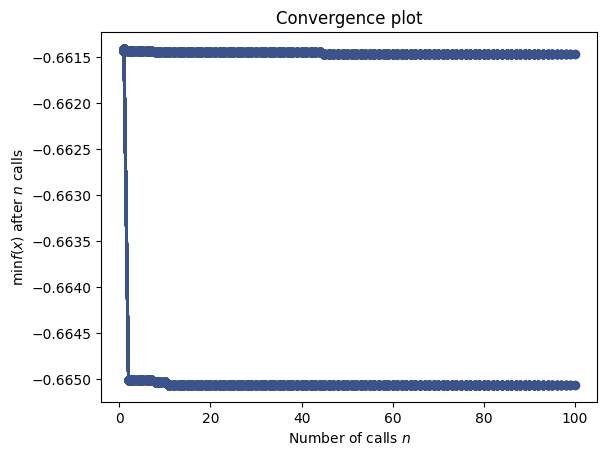

In [73]:
# Recherche des meilleurs paramètres pour LogisticRegression
bayes_search_lr = BayesSearchCV(estimator=model_lr, 
                                search_spaces=param_grid_lr, 
                                n_iter=100, 
                                cv=5, 
                                scoring='f1_macro', 
                                n_jobs=10, 
                                return_train_score=True, 
                                random_state=42)
bayes_search_lr.fit(X_train_ro, y_train_ro, callback=[checkpoint_clbk, print_infos_cbk])

In [79]:
# Affichage des meilleurs paramètres
cv_results_lgbm = pd.DataFrame(bayes_search_lgbm.cv_results_)
print('HistGradientBoostingClassifier')
display(cv_results_lgbm.iloc[-1]["params"])

print("---------------------------------------------------------")
cv_results_ridgeclf = pd.DataFrame(bayes_search_ridgeclf.cv_results_)
print("RidgeClassifier")
display(cv_results_ridgeclf.iloc[-1]["params"])

print("---------------------------------------------------------")
cv_results_lr = pd.DataFrame(bayes_search_lr.cv_results_)
print("LogisticRegression")
display(cv_results_lr.iloc[-1]["params"])

HistGradientBoostingClassifier


OrderedDict([('l2_regularization', 1),
             ('learning_rate', 0.2),
             ('max_depth', 20),
             ('max_iter', 200),
             ('max_leaf_nodes', 63),
             ('min_samples_leaf', 30)])

---------------------------------------------------------
RidgeClassifier


OrderedDict([('alpha', 0.1),
             ('max_iter', 100),
             ('solver', 'auto'),
             ('tol', 0.01)])

---------------------------------------------------------
LogisticRegression


OrderedDict([('C', 1),
             ('l1_ratio', 0.5),
             ('max_iter', 100),
             ('penalty', 'l1'),
             ('solver', 'saga')])

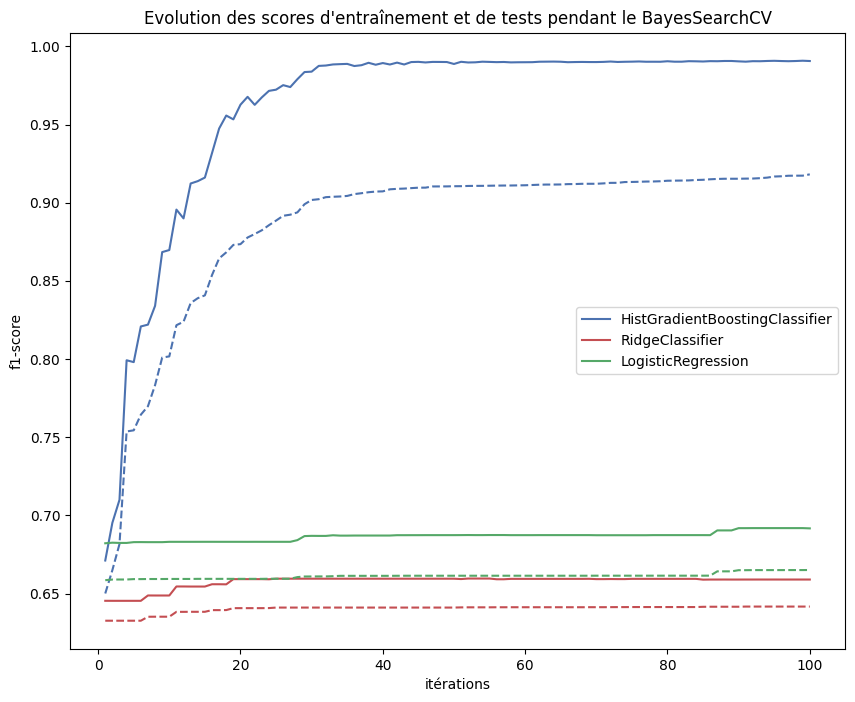

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(1, len(cv_results_lgbm)+1), cv_results_lgbm["mean_train_score"], label="HistGradientBoostingClassifier", color="#4C72B0")
plt.plot(np.arange(1, len(cv_results_lgbm)+1), cv_results_lgbm["mean_test_score"], ls='--', color="#4C72B0")

plt.plot(np.arange(1, len(cv_results_ridgeclf)+1), cv_results_ridgeclf["mean_train_score"], label="RidgeClassifier", color="#C44E52")
plt.plot(np.arange(1, len(cv_results_ridgeclf)+1), cv_results_ridgeclf["mean_test_score"], ls='--', color="#C44E52")

plt.plot(np.arange(1, len(cv_results_lr)+1), cv_results_lr["mean_train_score"], label="LogisticRegression", color="#55A868")
plt.plot(np.arange(1, len(cv_results_lr)+1), cv_results_lr["mean_test_score"], ls='--', color="#55A868")
plt.title("Evolution des scores d'entraînement et de tests pendant le BayesSearchCV")
plt.xlabel("itérations")
plt.ylabel("f1-score")
plt.legend()
plt.show()

In [ ]:
# On voit sur le graphique ci-dessus que les modèles sont overfittés. C'est sûrement dû au très grand nombre de features que nous avons (+500) qui n'est
# pas très approprié pour du Machine Learning.

In [25]:
from sklearn.model_selection import cross_validate, StratifiedKFold

# Cross-validation des modèles avec les paramètres trouvés
model_lgbm = HistGradientBoostingClassifier(l2_regularization=1,
                                            learning_rate=0.2,
                                            max_depth=20,
                                            max_iter=200,
                                            max_leaf_nodes=63,
                                            min_samples_leaf=30,
                                            scoring="f1_macro",
                                            random_state=42)

model_ridgeclf = RidgeClassifier(alpha=0.1,
                                 max_iter=100,
                                 solver='auto',
                                 tol=0.01,
                                 random_state=42)

model_lr = LogisticRegression(C=1,
                              max_iter=100,
                              penalty="l1",
                              solver="saga",
                              random_state=42)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_lgbm = cross_validate(model_lgbm, X_train_ro, y_train_ro, cv=skf, scoring="f1_macro", return_train_score=True)
scores_ridgeclf = cross_validate(model_ridgeclf, X_train_ro, y_train_ro, cv=skf, scoring="f1_macro", return_train_score=True)
scores_lr = cross_validate(model_lr, X_train_ro, y_train_ro, cv=skf, scoring="f1_macro", return_train_score=True)

print("----------------HistGradientBoostingClassifier-------------------")
print("F1-scores sur les ensembles de test :", scores_lgbm['test_score'])
print("F1-scores sur les ensembles d'entraînement :", scores_lgbm['train_score'])
print("Temps d'entraînement :", scores_lgbm['fit_time'])

print("----------------RidgeClassifier-------------------")
print("F1-scores sur les ensembles de test :", scores_ridgeclf['test_score'])
print("F1-scores sur les ensembles d'entraînement :", scores_ridgeclf['train_score'])
print("Temps d'entraînement :", scores_ridgeclf['fit_time'])

print("----------------LogisticRegression-------------------")
print("F1-scores sur les ensembles de test :", scores_lr['test_score'])
print("F1-scores sur les ensembles d'entraînement :", scores_lr['train_score'])
print("Temps d'entraînement :", scores_lr['fit_time'])

c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


----------------HistGradientBoostingClassifier-------------------
F1-scores sur les ensembles de test : [0.89909549 0.89813582 0.8945815  0.90112485 0.89785733]
F1-scores sur les ensembles d'entraînement : [0.99029942 0.98956816 0.98887937 0.99018315 0.98937513]
Temps d'entraînement : [30.88141561 47.82020831 39.42372584 51.97517705 36.97319794]
----------------RidgeClassifier-------------------
F1-scores sur les ensembles de test : [0.63192493 0.63161726 0.64486817 0.63694511 0.64742898]
F1-scores sur les ensembles d'entraînement : [0.66337845 0.6586113  0.65747235 0.66139441 0.65664454]
Temps d'entraînement : [0.43235111 0.37303925 0.34922695 0.42684746 0.58474398]
----------------LogisticRegression-------------------
F1-scores sur les ensembles de test : [0.6412081  0.63665193 0.65432979 0.64216549 0.65692961]
F1-scores sur les ensembles d'entraînement : [0.67092656 0.66713857 0.66753927 0.66827847 0.66408923]
Temps d'entraînement : [41.35241461 39.38447571 35.99104428 35.6344378  3

c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [26]:
model_lgbm.fit(X_train_ro, y_train_ro)
model_ridgeclf.fit(X_train_ro, y_train_ro)
model_lr.fit(X_train_ro, y_train_ro)

c:\Users\antoi\MachineLearning\PROJET COVID19\NOV24-BDS---Covid19-groupe-1\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, penalty='l1', random_state=42, solver='saga')

In [27]:
print("---------------------------------------------------")
print("----------HistGradientBoostingClassifier-----------")
print("---------------------------------------------------")
y_pred_lgbm = model_lgbm.predict(X_test_ro)
clf_report_lgbm = classification_report(y_test, y_pred_lgbm)
print(clf_report_lgbm)



---------------------------------------------------
----------HistGradientBoostingClassifier-----------
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.41      0.47       723
           1       0.65      0.68      0.67      1203
           2       0.77      0.82      0.79      2038
           3       0.87      0.81      0.84       269

    accuracy                           0.71      4233
   macro avg       0.71      0.68      0.69      4233
weighted avg       0.70      0.71      0.70      4233



In [28]:
print("---------------------------------------------------")
print("------------------RidgeClassifier------------------")
print("---------------------------------------------------")
y_pred_ridgeclf = model_ridgeclf.predict(X_test_ro)
clf_report_ridgeclf = classification_report(y_test, y_pred_ridgeclf)
print(clf_report_ridgeclf)

---------------------------------------------------
------------------RidgeClassifier------------------
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.40      0.38      0.39       723
           1       0.61      0.56      0.59      1203
           2       0.73      0.66      0.69      2038
           3       0.42      0.94      0.58       269

    accuracy                           0.60      4233
   macro avg       0.54      0.64      0.56      4233
weighted avg       0.62      0.60      0.60      4233



In [29]:
print("---------------------------------------------------")
print("----------------LogisticRegression-----------------")
print("---------------------------------------------------")
y_pred_lr = model_lr.predict(X_test_ro)
clf_report_lr = classification_report(y_test, y_pred_lr)
print(clf_report_lr)

---------------------------------------------------
----------------LogisticRegression-----------------
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.39      0.40      0.40       723
           1       0.61      0.55      0.58      1203
           2       0.74      0.67      0.70      2038
           3       0.45      0.95      0.61       269

    accuracy                           0.61      4233
   macro avg       0.55      0.64      0.57      4233
weighted avg       0.62      0.61      0.61      4233



In [31]:
y_pred = model_lgbm.predict(X_test_ro)
display(pd.crosstab(y_pred, y_test, colnames=['Réalité'], rownames=['Prédictions']))

Réalité,0,1,2,3
Prédictions,,,,
0,299,118,119,13
1,192,822,233,16
2,228,258,1663,22
3,4,5,23,218


In [98]:
cv_results_lgbm = pd.DataFrame(bayes_search_lgbm.cv_results_).sort_values(by="mean_test_score")
cv_results_ridgeclf = pd.DataFrame(bayes_search_ridgeclf.cv_results_).sort_values(by="mean_test_score")
cv_results_lr = pd.DataFrame(bayes_search_lr.cv_results_).sort_values(by="mean_test_score").iloc[-100:]
display(cv_results_lgbm.tail())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l2_regularization,param_learning_rate,param_max_depth,param_max_iter,param_max_leaf_nodes,param_min_samples_leaf,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score,rank_train_score
50,150.952897,7.247201,1.207207,0.316615,0,0.1,None,200,63,30,...,0.025623,5,0.991529,0.990875,0.990954,0.989917,0.989688,0.990593,0.000687,8
24,323.652378,14.339198,2.829765,0.462413,1,0.05,None,400,63,30,...,0.024801,4,0.991528,0.990800,0.990607,0.989992,0.989495,0.990484,0.000696,12
39,269.734774,4.834616,2.307024,0.377245,0,0.05,20,400,63,30,...,0.025313,3,0.991337,0.991222,0.990953,0.989688,0.989803,0.990600,0.000710,7
18,551.952677,27.145893,3.137724,1.046586,0,0.05,None,400,63,20,...,0.025145,2,0.991491,0.991490,0.990762,0.990071,0.990148,0.990792,0.000618,1
72,298.800701,20.493597,2.424327,0.524332,0,0.05,None,400,63,30,...,0.025594,1,0.991414,0.991184,0.990877,0.989496,0.990033,0.990601,0.000724,6


# Partie 4 : Enregistrement des modèles

In [104]:
path = get_absolute_path(r"notebooks\AntoineB\artifacts\models")

for model, file_name in zip([model_lgbm, model_ridgeclf, model_lr], ["model_lgbm.pkl", "model_ridgeclf.pkl", "model_lr.pkl"]):
    full_path = Path(path, file_name)

    with open(full_path, 'wb') as f:
        pickle.dump(model, f)